<a href="https://colab.research.google.com/github/praveen101323/v/blob/main/ml_random_forest_watch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/neo-stark-team/Datasets/main/smartwatch.csv')
df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [ ]:
df.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [ ]:
df1= df.select_dtypes('number')
df1

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df1.corr()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
Unnamed: 0,1.000000,0.449037,0.126539,-0.225263,-0.204343,-0.206349,-0.252668,-0.067211,0.447055,0.335736,-0.159582,-0.326790,-0.160754,0.379415,0.052239,-0.009939,0.095454,0.149589
X1,0.449037,1.000000,0.299608,-0.465047,-0.369403,-0.262244,0.138594,0.181164,-0.156275,0.055878,-0.067306,-0.138498,-0.130887,-0.060269,0.280584,0.308903,0.298053,0.014122
age,0.126539,0.299608,1.000000,-0.236032,-0.518798,-0.152317,0.006394,-0.007665,-0.064661,-0.061169,-0.002541,-0.001528,-0.022833,0.068108,0.009318,0.071297,0.058018,-0.045816
gender,-0.225263,-0.465047,-0.236032,1.000000,0.735852,0.580446,-0.069719,-0.093476,0.071875,-0.051779,-0.051111,0.014608,-0.082235,-0.039968,-0.032913,-0.064392,-0.057793,0.022257
height,-0.204343,-0.369403,-0.518798,0.735852,1.000000,0.693504,0.025729,-0.123519,0.034447,-0.091422,-0.069491,0.049100,-0.028330,-0.031292,-0.103492,-0.124562,-0.090542,-0.075755
weight,-0.206349,-0.262244,-0.152317,0.580446,0.693504,1.000000,0.045389,-0.064317,-0.023612,-0.072294,-0.156601,-0.052906,-0.014345,-0.064750,-0.054192,-0.064944,-0.009806,-0.008666
steps,-0.252668,0.138594,0.006394,-0.069719,0.025729,0.045389,1.000000,0.164084,-0.250973,-0.090433,0.021579,0.086400,0.083964,-0.229163,0.102876,0.144211,0.112486,0.023798
hear_rate,-0.067211,0.181164,-0.007665,-0.093476,-0.123519,-0.064317,0.164084,1.000000,-0.141972,-0.068879,0.060427,0.036693,0.382275,-0.174136,0.723648,0.780478,0.280313,0.064759
calories,0.447055,-0.156275,-0.064661,0.071875,0.034447,-0.023612,-0.250973,-0.141972,1.000000,0.255145,0.001069,-0.105678,-0.055703,0.208055,-0.101669,-0.164999,-0.148178,0.119908
distance,0.335736,0.055878,-0.061169,-0.051779,-0.091422,-0.072294,-0.090433,-0.068879,0.255145,1.000000,-0.056429,-0.296744,-0.320791,0.081354,0.170087,0.066103,0.296582,0.653995


<Axes: >

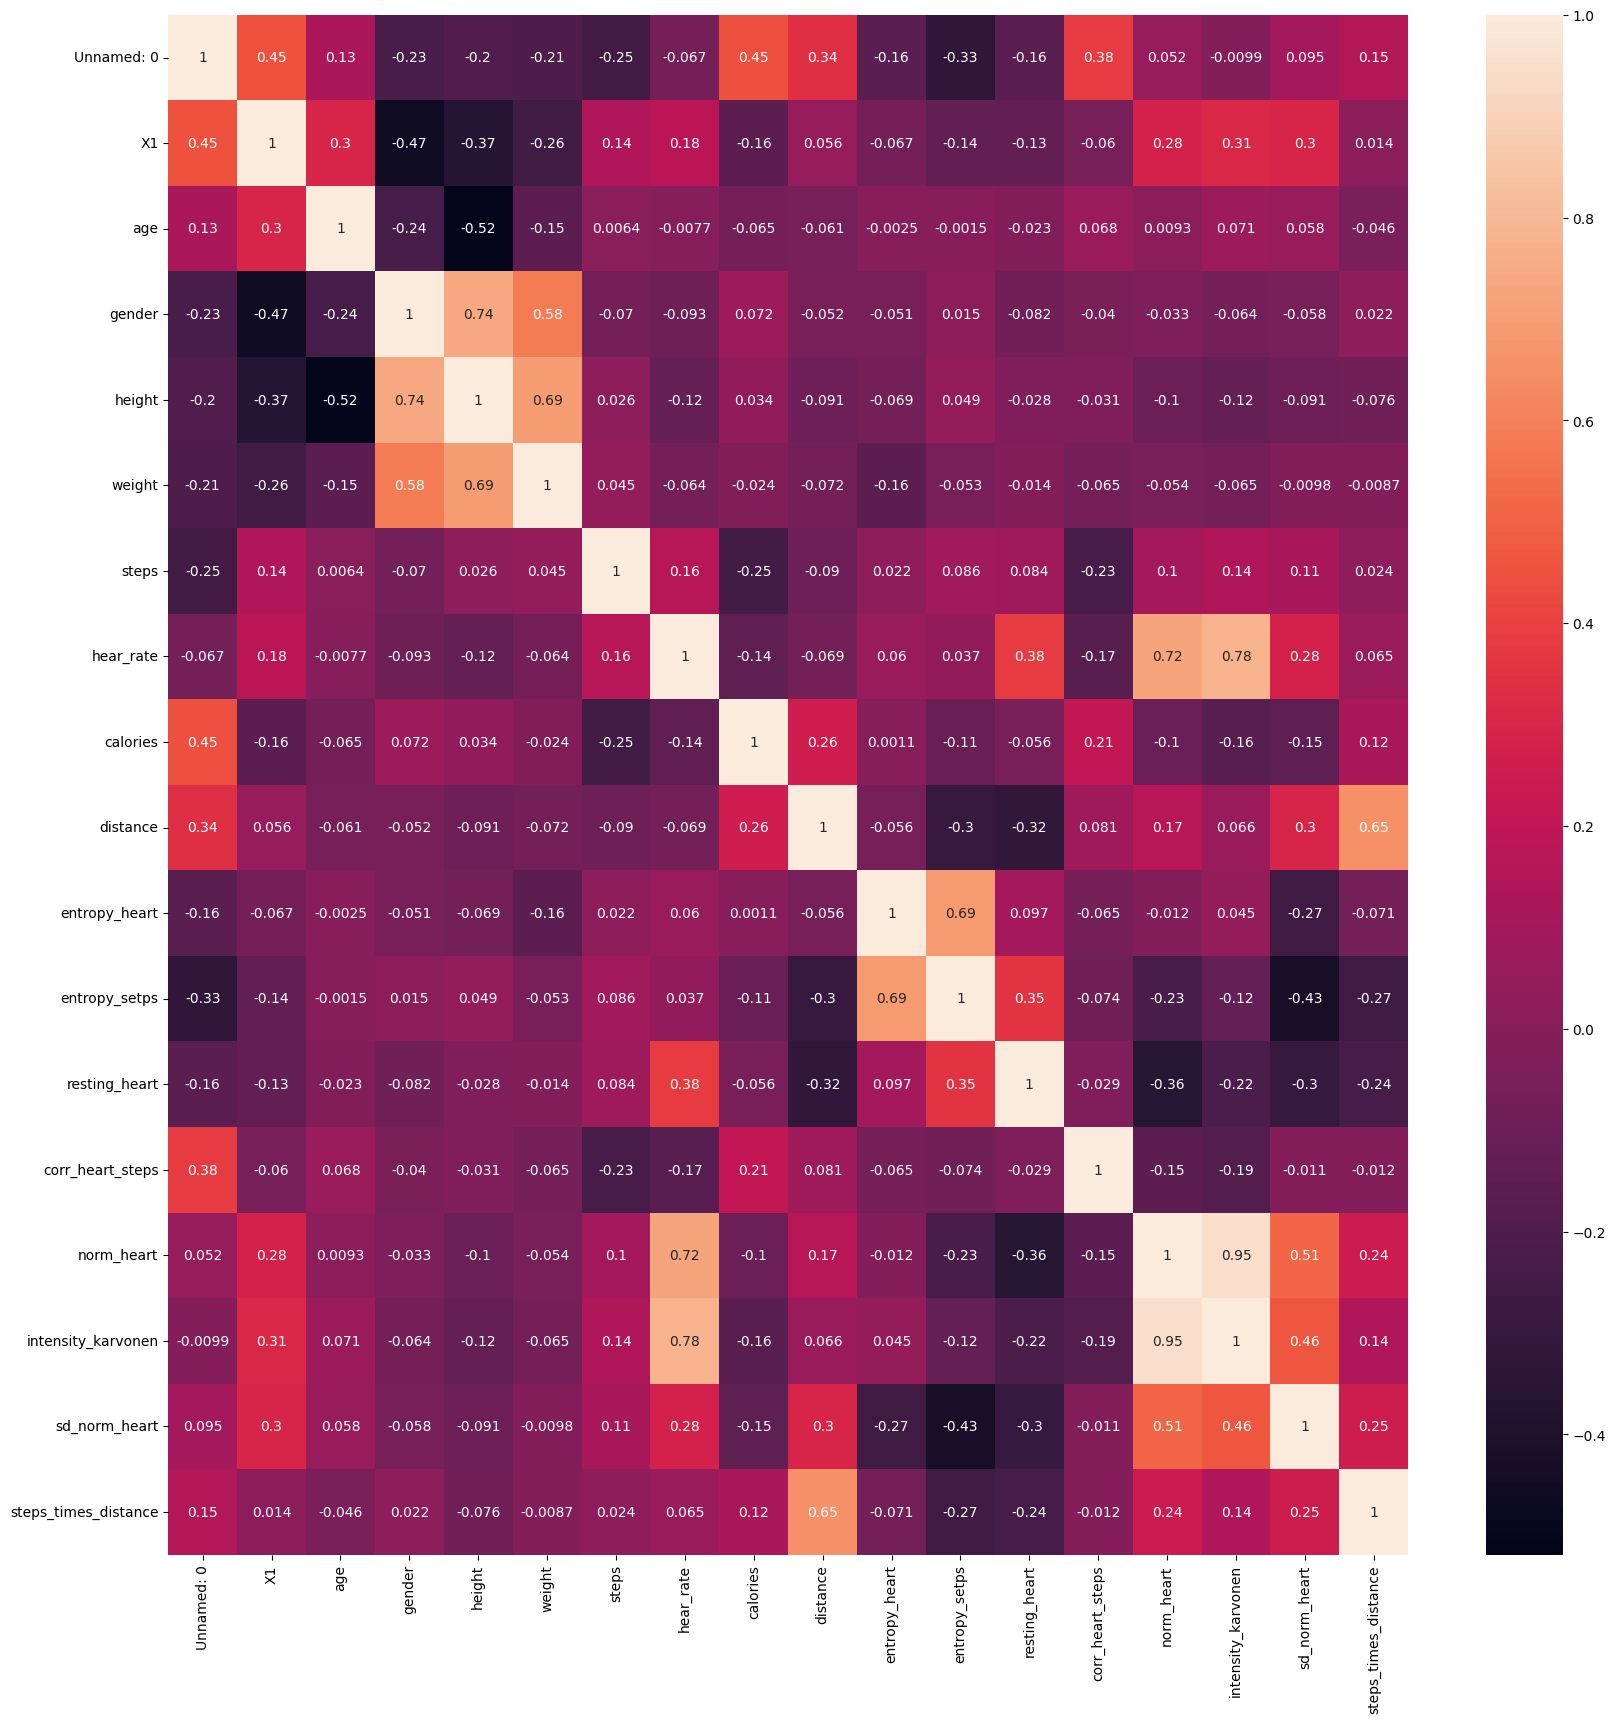

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot = True)

In [ ]:
df.fillna(df.mode().iloc[0],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [ ]:
x = df.drop('activity',axis = 1)
y = df['activity']
x = pd.get_dummies(data=x, columns=['device'])

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.8,random_state= 2)
x_train,x_test,y_train,y_test

(      Unnamed: 0    X1  age  gender  height  weight        steps   hear_rate  \
 749          750   750   22       1   185.0    79.4     8.891837   75.493880   
 6134        6135  3465   36       0   172.0    86.4     8.263158   76.925038   
 1999        2000  2004   19       1   180.0    62.7     5.125000   93.250000   
 2787        2788  2802   25       0   166.0    68.0   106.000000  119.000000   
 209          210   210   24       0   165.0    43.0  1094.444444  148.083333   
 ...          ...   ...  ...     ...     ...     ...          ...         ...   
 1099        1100  1100   27       1   176.0    81.8    20.640100   62.473214   
 2514        2515  2529   56       1   164.0    62.0     5.583333  105.000000   
 3606        3607  3621   46       0   157.5    71.4   289.571429   98.789886   
 5704        5705  2903   25       0   160.0    57.7     3.170497  125.110954   
 2575        2576  2590   31       0   168.0    68.0   103.280000   94.750000   
 
        calories   distanc

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['Self Pace walk', 'Running 7 METs', 'Running 7 METs', ...,
       'Self Pace walk', 'Lying', 'Lying'], dtype=object)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)
classi=classification_report(y_test, y_pred)
print(accuracy, conf, classi)

0.8004788507581804 [[205  23   9  11  16  16]
 [ 18 153   9   0   3   3]
 [  8   4 159  11   2  15]
 [ 10   1   6 201   0   8]
 [ 13   2   3   2 140   8]
 [ 16   5  15   2  11 145]]                 precision    recall  f1-score   support

         Lying       0.76      0.73      0.75       280
Running 3 METs       0.81      0.82      0.82       186
Running 5 METs       0.79      0.80      0.80       199
Running 7 METs       0.89      0.89      0.89       226
Self Pace walk       0.81      0.83      0.82       168
       Sitting       0.74      0.75      0.75       194

      accuracy                           0.80      1253
     macro avg       0.80      0.80      0.80      1253
  weighted avg       0.80      0.80      0.80      1253



In [ ]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = model1.predict(x_test)
pred

array(['Self Pace walk', 'Running 7 METs', 'Running 7 METs', ...,
       'Self Pace walk', 'Lying', 'Lying'], dtype=object)

In [ ]:
accuracy1=accuracy_score(y_test, pred)
conf1=confusion_matrix(y_test, pred)
classi1=classification_report(y_test, pred)
print(accuracy1, conf1, classi1)

0.8659217877094972 [[224  20   3   2  12  19]
 [ 15 163   3   0   4   1]
 [ 10   3 171   5   0  10]
 [  2   0   1 216   0   7]
 [  9   0   1   0 148  10]
 [  5   2   9   7   8 163]]                 precision    recall  f1-score   support

         Lying       0.85      0.80      0.82       280
Running 3 METs       0.87      0.88      0.87       186
Running 5 METs       0.91      0.86      0.88       199
Running 7 METs       0.94      0.96      0.95       226
Self Pace walk       0.86      0.88      0.87       168
       Sitting       0.78      0.84      0.81       194

      accuracy                           0.87      1253
     macro avg       0.87      0.87      0.87      1253
  weighted avg       0.87      0.87      0.87      1253

